In [1]:
import os, sys
os.environ['PYTHONHASHSEED']=str(1)
PATH_TO_REPO = '/'.join(os.getcwd().split('/')[:-1])
sys.path.append(PATH_TO_REPO)

import pandas as pd
import pickle

import tensorflow as tf
import random

from src.python.tf.predictor import predictor
from src.utils.pltutils import plt

In [2]:
# remove duplicate paths
_paths = []
for p in sys.path:
    if p not in _paths: _paths.append(p)
sys.path = _paths

In [3]:
XTAL = 54000
YEAR = 2016
SCALER = 'None'
PERIOD = 35
MODEL = '../output/models/lstm_25_period_35_calib_inst_lumi_deltat_xtal_54000_epochs_1_batch_1_seed_7'
PATH_TO_INPUT = '../data/interim/'
PATH_TO_OUTPUT = '../output/plots/'
PREDICTION_TYPE = 'instantaneous'
START_ENTRY = 0
LOAD_PICKLES = False

prd = predictor(XTAL, YEAR, PERIOD)
prd.load_model(MODEL)
if (LOAD_PICKLES):
    prd.load_scaler(SCALER)
    prd.load_from_pickle(PATH_TO_INPUT)
else:
    prd.load_dataset(SCALER,PATH_TO_INPUT, START_ENTRY)

mape, target, predictions = prd.plot_predictions_vs_target(PREDICTION_TYPE, PATH_TO_OUTPUT)
with open(PATH_TO_OUTPUT+'/predictions.pickle', 'wb') as file0:
    pickle.dump(predictions, file0)
with open(PATH_TO_OUTPUT+'/target.pickle', 'wb') as file0:
    pickle.dump(target, file0)

print("MAPE: ", mape)

Using self-scaling ...


/panfs/jay/groups/2/rusack/joshib/fair_ecal_monitoring/src/python/tf/data_processor.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tmp['calibration+'+str(i)] = self.df['calibration'].shift(periods=-i, fill_value=0.0).to_numpy()
/panfs/jay/groups/2/rusack/joshib/fair_ecal_monitoring/src/python/tf/data_processor.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tmp['delta_lumi+'+str(i)] = self.df['delta_lumi'].shift(periods=-i, fill_value=0.0).to_numpy()
/panfs/jay/groups/2/rusack/joshib/fair_ecal_monitoring/src/python/

MAPE:  0.05734041970163299


<Figure size 640x480 with 0 Axes>

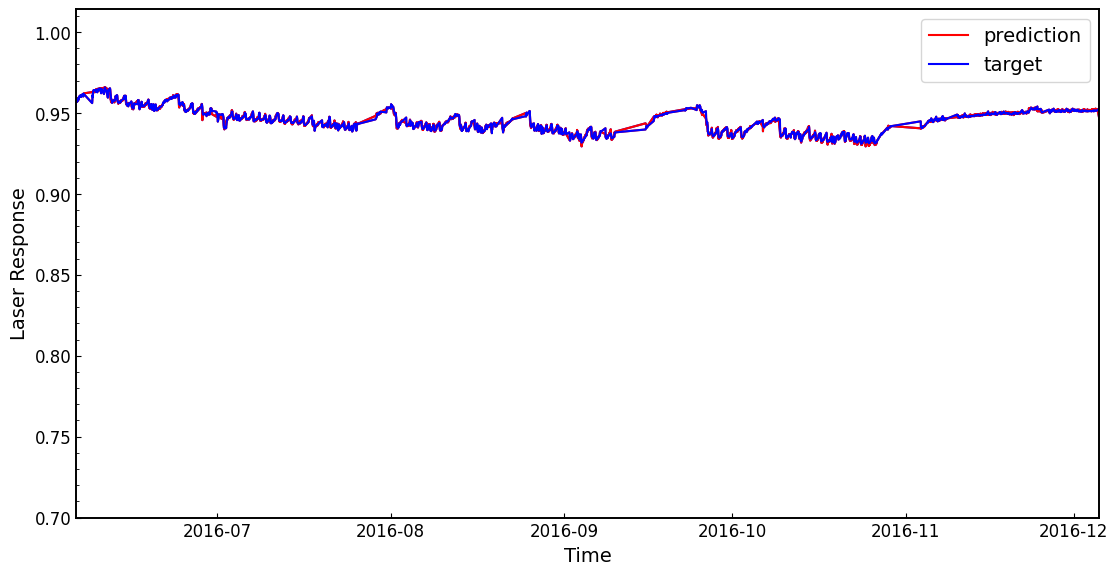

In [4]:
plt.plot(target[0]._x, target[0]._y, 'r-', label='Target')
plt.plot(predictions[0]._x, predictions[0]._y, 'b-', label='Prediction')
plt.show()